<a href="https://colab.research.google.com/github/SergiiRv/first/blob/master/NEURON_LAb3_SergiiRomanenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install neuron

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 61.5 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
!unzip /content/drive/MyDrive/mods.zip

Archive:  /content/drive/MyDrive/mods.zip
   creating: mods/
  inflating: mods/cad.mod            
  inflating: mods/ca.mod             
  inflating: mods/kca.mod            
  inflating: mods/km.mod             
  inflating: mods/kv.mod             
  inflating: mods/na.mod             


In [6]:
!nrnivmodl mods

/content
Mod files: "mods/mods/cad.mod" "mods/mods/ca.mod" "mods/mods/kca.mod" "mods/mods/km.mod" "mods/mods/kv.mod" "mods/mods/na.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../mods/cad.mod
 -> NMODL ../mods/ca.mod
 -> NMODL ../mods/kca.mod
Translating cad.mod into /content/x86_64/cad.c
Thread Safe
Translating kca.mod into /content/x86_64/kca.c
Translating ca.mod into /content/x86_64/ca.c
Thread Safe
Thread Safe
 -> NMODL ../mods/km.mod
 -> NMODL ../mods/kv.mod
 -> NMODL ../mods/na.mod
Translating na.mod into /content/x86_64/na.c
Translating km.mod into /content/x86_64/km.c
Thread Safe
Translating kv.mod into /content/x86_64/kv.c
 -> Compiling cad.c
Thread Safe
Thread Safe
 -> Compiling ca.c
 -> Compiling kca.c
 -> Compiling km.c
 -> Compiling kv.c
 -> Compiling na.c
 => LINKING shared library ./libnrnmech.so
 => LINKING executable ./special LDFLAGS are:    -pthread
Successfully created x86_64/special


In [7]:
%matplotlib inline
from numpy import *
from numpy import random as rnd
from matplotlib.pyplot import *
from neuron import h
import seaborn as sns
import pandas as pd

In [8]:
h.dt = 0.05

In [9]:
h.celsius = 37
class neuron:
  def __init__(self, excsyn: bool, inhsyn:bool):
    self.dend = h.Section()
    self.Ra = copy(self.dend.Ra)
    self.dend.diam = 10/pi
    self.dend.nseg = 1
    self.axon = h.Section()
    self.axon.nseg = 1
    self.axon.diam = 10/pi
    self.axon.L = 10
    self.axon.connect(self.dend(1), 0)

    for ionch in 'na km kca ca cad pas'.split():
      self.dend.insert(ionch)

    for ionch in 'na', 'kv':
      self.axon.insert(ionch)

    self.dend.cm = 0.75
    self.axon.cm = 0.75

    self.axon.ek = -90
    self.dend.ek = -90
    self.dend.ena = 60
    self.axon.ena = 60
    self.dend.eca = 140

    self.dend.g_pas =1/30000
    self.dend.e_pas = -70
    self.dend.gbar_na = 15
    self.dend.gbar_ca = 0.3
    self.dend.gbar_km = 0.1
    self.dend.gbar_kca = 3

    self.axon.gbar_na = 30000
    self.axon.gbar_kv = 1500

  def set(self, rho:float = 160, kappa:float = 30):
    self.dend.L = rho*self.axon.L
    self.dend.Ra = self.Ra*kappa/h.ri(0.5, sec = self.dend)






In [10]:
"""
n = neuron(False, False)
#n.set(rho =160, kappa = 30)
n.set(rho = 260, kappa = 8)

va, vd = h.Vector(), h.Vector()
va.record(n.axon(0.5)._ref_v, sec = n.axon)
vd.record(n.dend(0.5)._ref_v, sec = n.dend)

ic = h.IClamp(0.5, n.dend, sec = n.dend)
ic.delay = 30
ic.dur = 1000
ic.amp = 0.1

h.finitialize(-70)
h.fcurrent()
h.frecord_init()

h.t = 0

while h.t < 1060: h.fadvance()

va = array(va)
vd = array(vd)
vt = arange(va.shape[0])*h.dt
plot(vt, va, "-", label = "axon")
plot(vt, vd, "-", label = "dend")
"""

'\nn = neuron(False, False)\n#n.set(rho =160, kappa = 30)\nn.set(rho = 260, kappa = 8)\n\nva, vd = h.Vector(), h.Vector()\nva.record(n.axon(0.5)._ref_v, sec = n.axon)\nvd.record(n.dend(0.5)._ref_v, sec = n.dend)\n\nic = h.IClamp(0.5, n.dend, sec = n.dend)\nic.delay = 30\nic.dur = 1000\nic.amp = 0.1\n\nh.finitialize(-70)\nh.fcurrent()\nh.frecord_init()\n\nh.t = 0\n\nwhile h.t < 1060: h.fadvance()\n\nva = array(va)\nvd = array(vd)\nvt = arange(va.shape[0])*h.dt\nplot(vt, va, "-", label = "axon")\nplot(vt, vd, "-", label = "dend")\n'

<ipython-input-16-8575805a8f29>:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure(i)


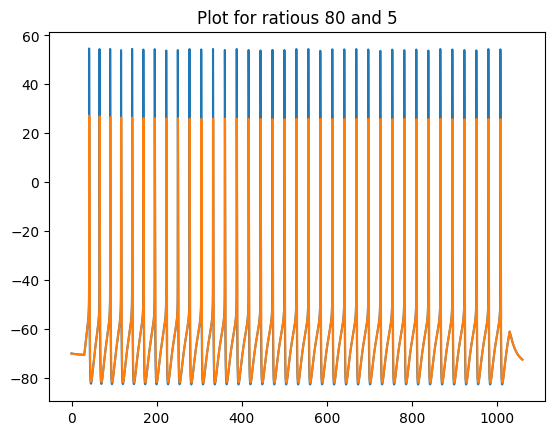

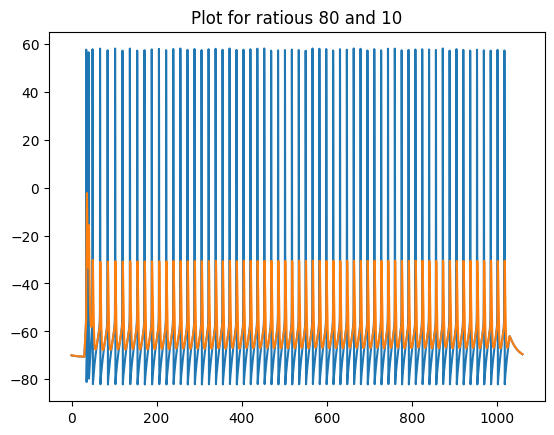

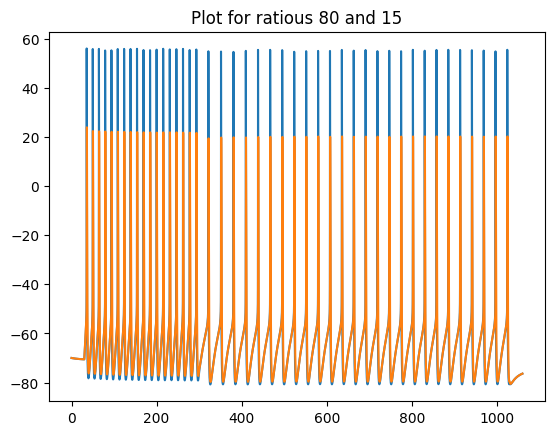

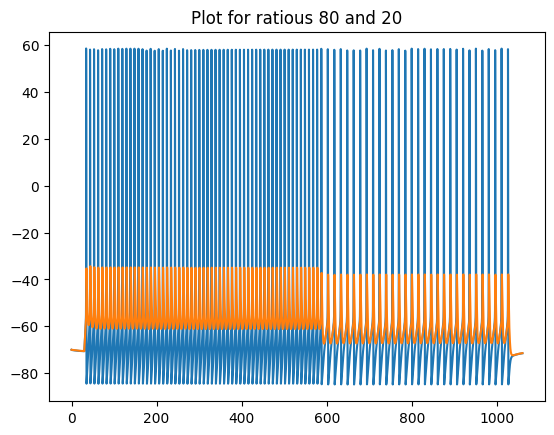

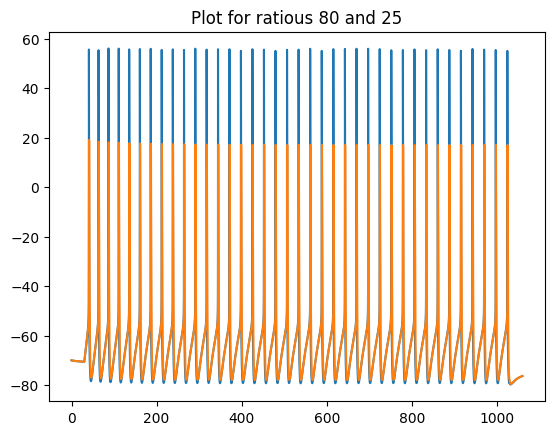

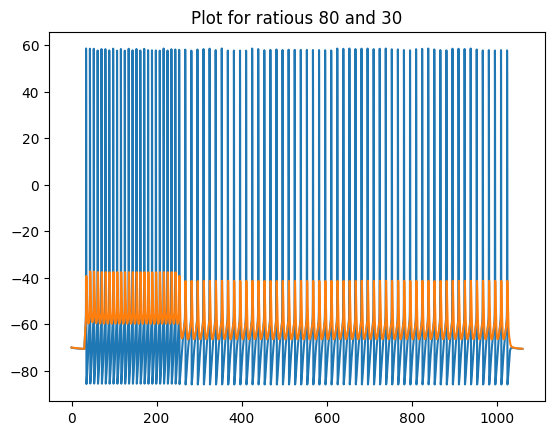

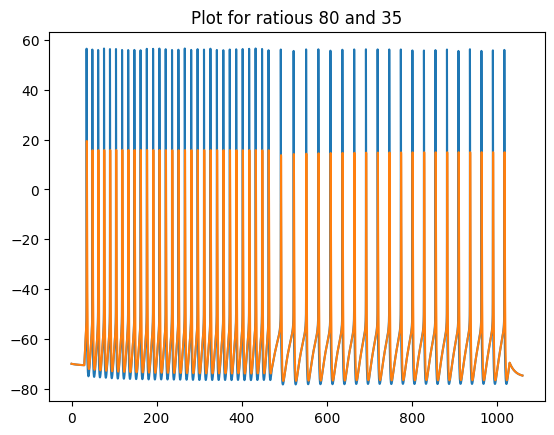

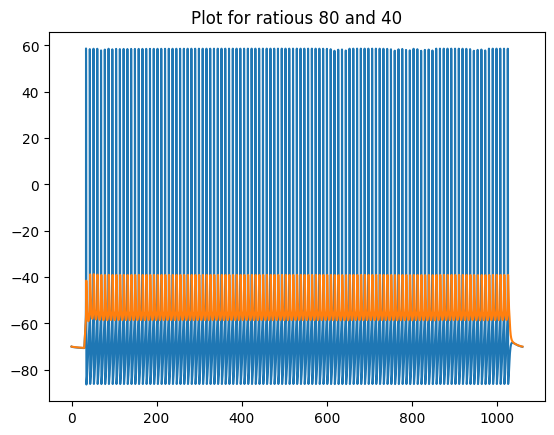

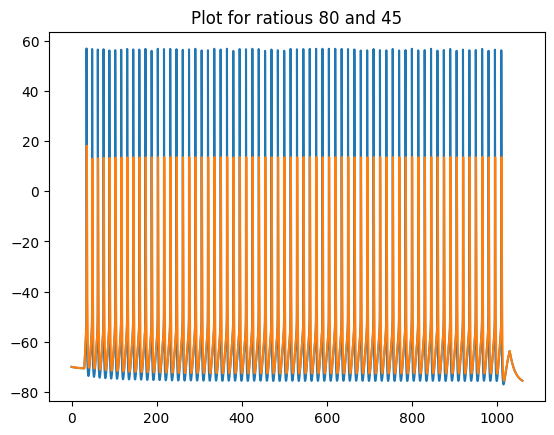

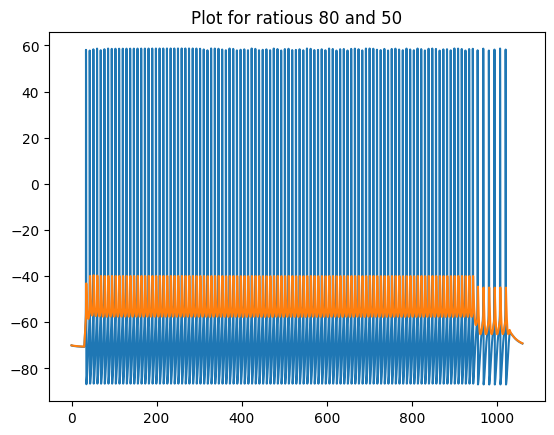

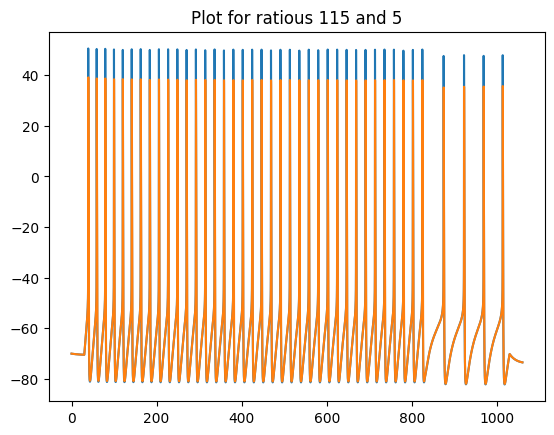

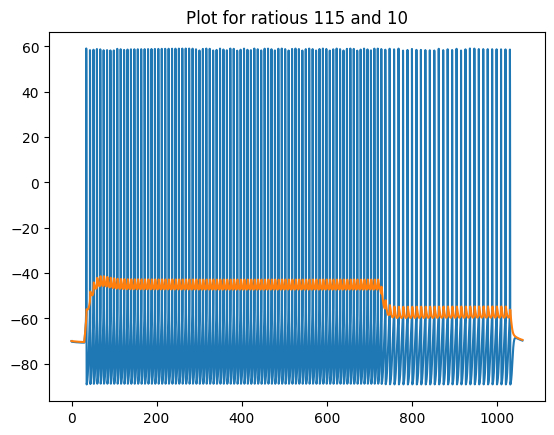

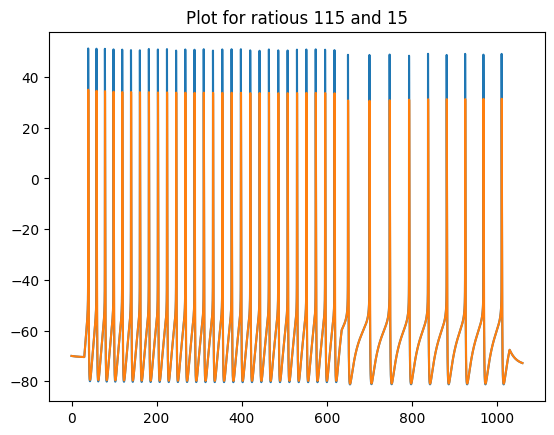

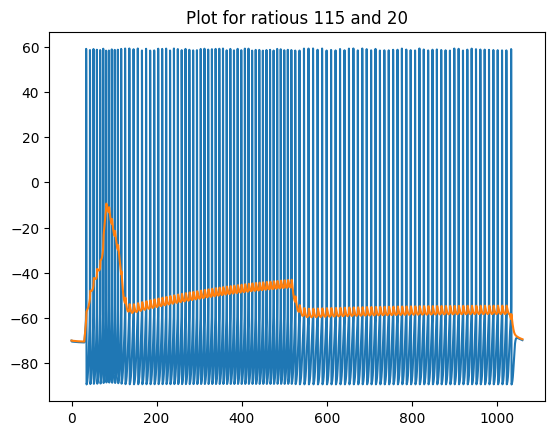

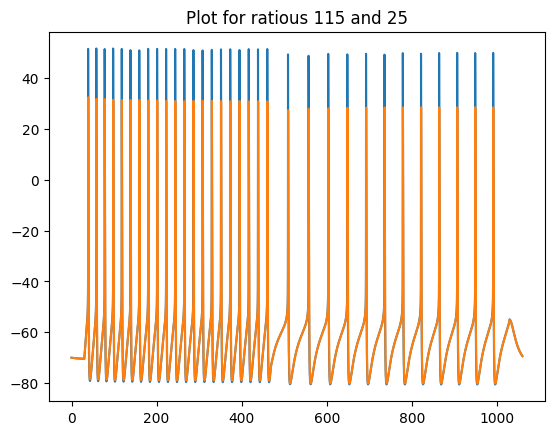

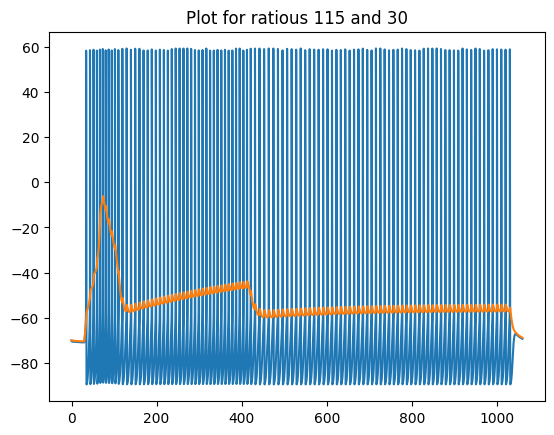

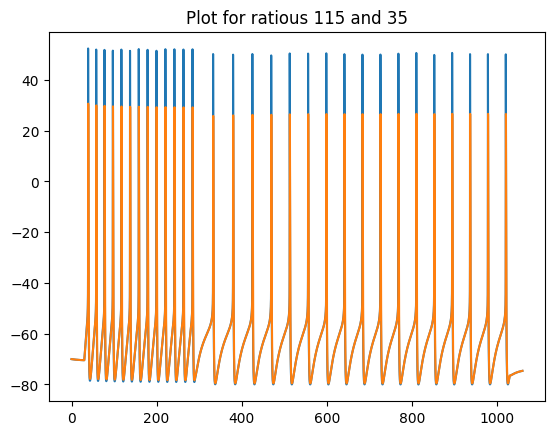

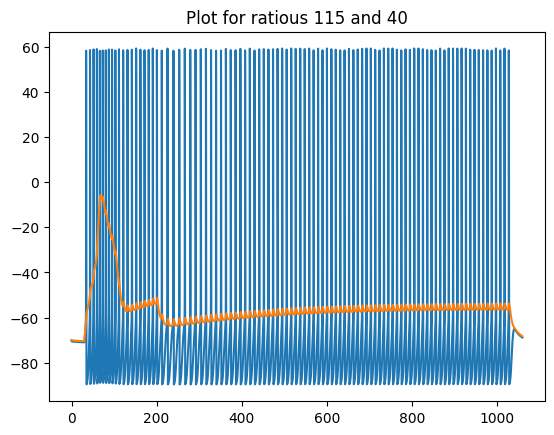

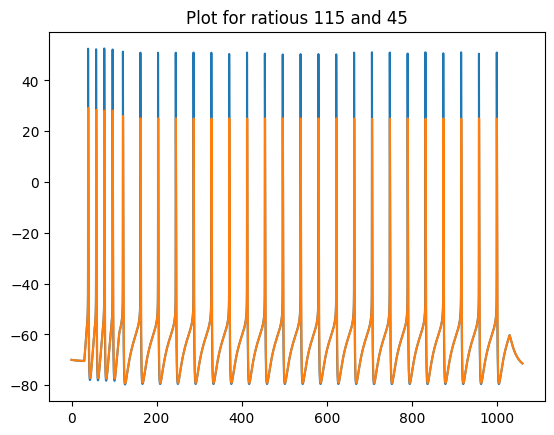

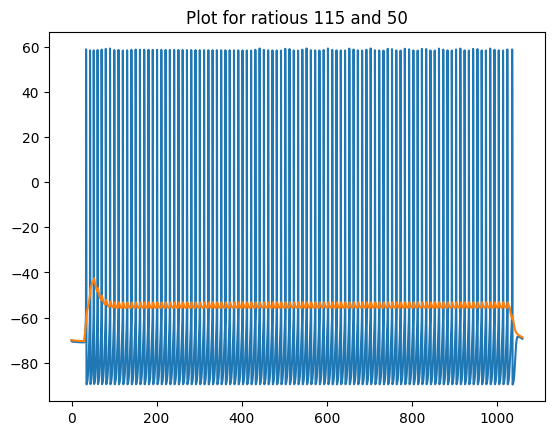

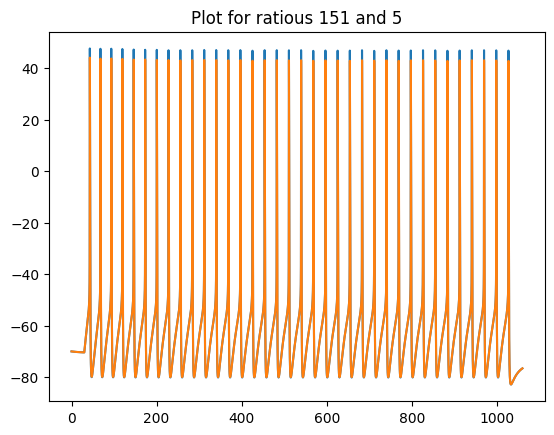

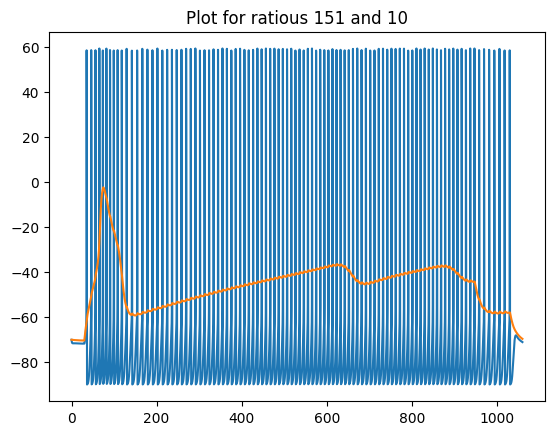

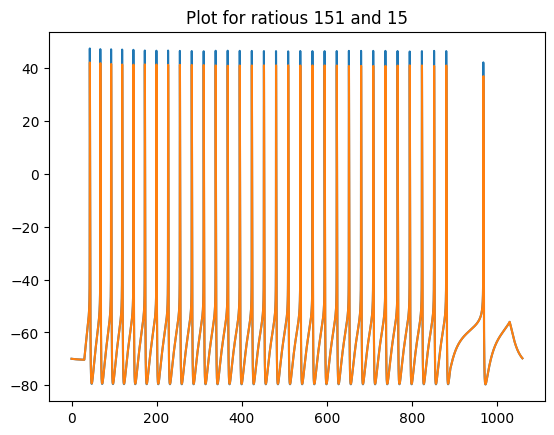

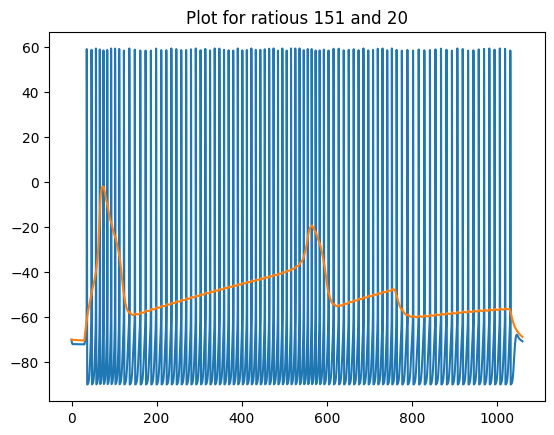

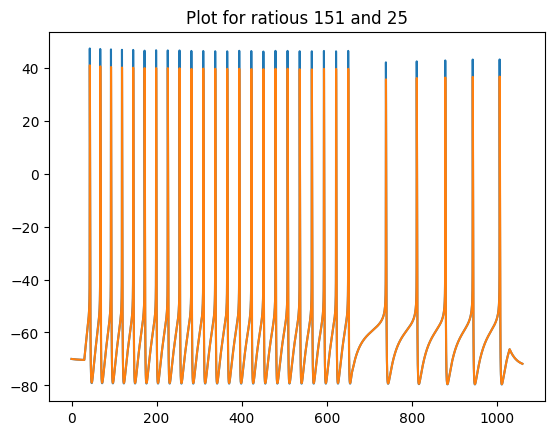

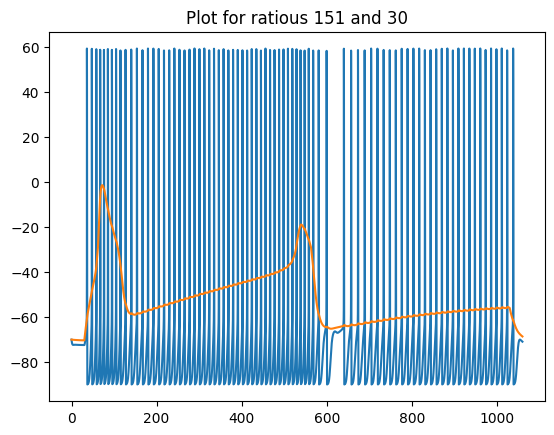

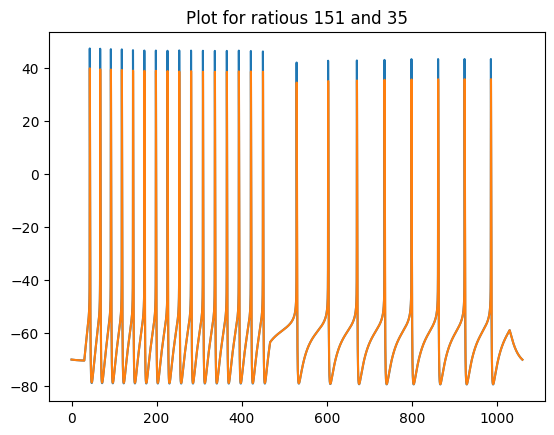

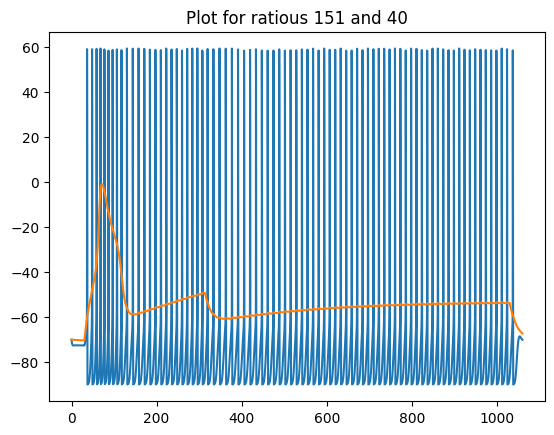

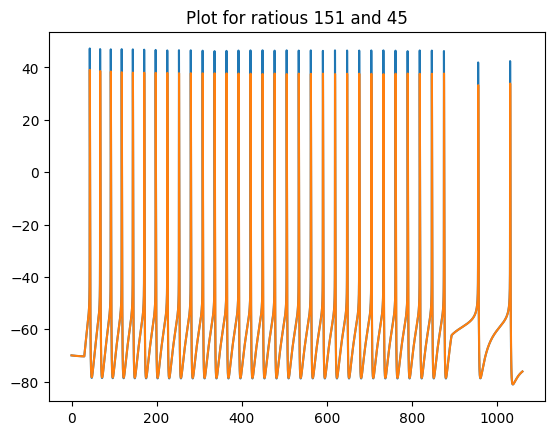

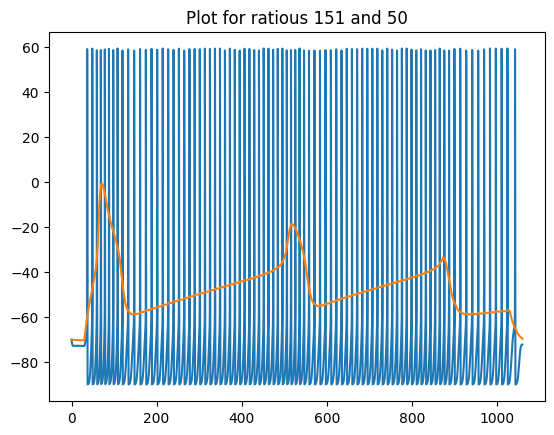

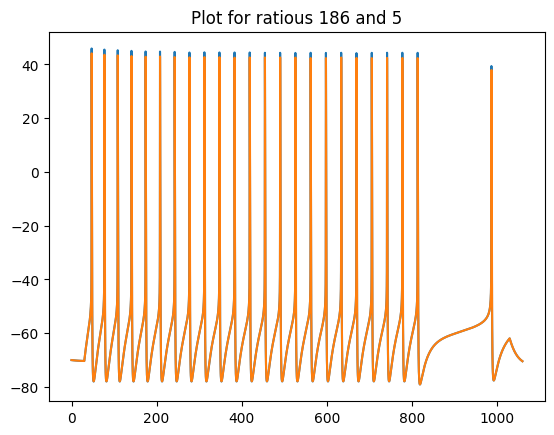

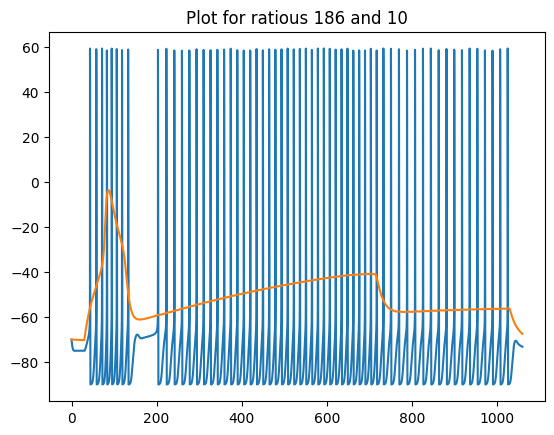

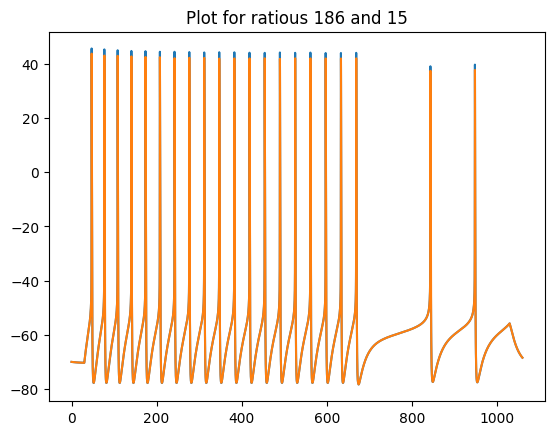

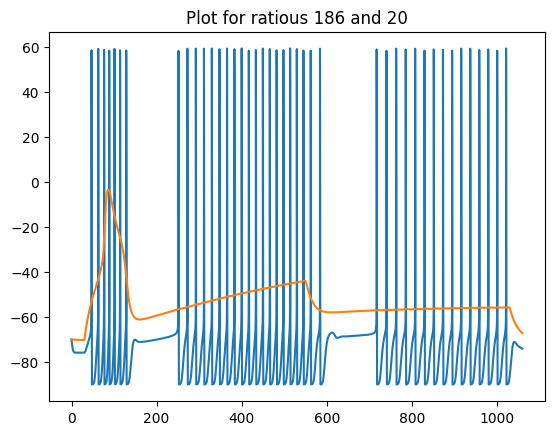

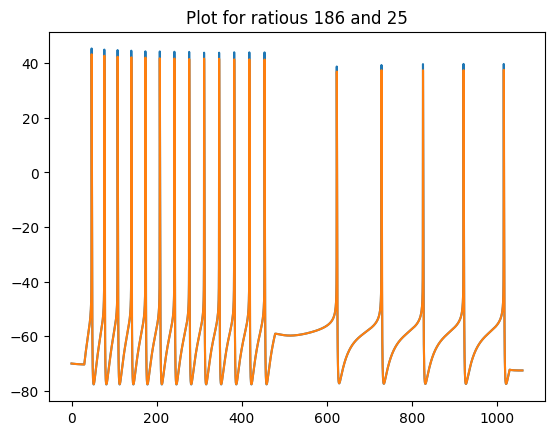

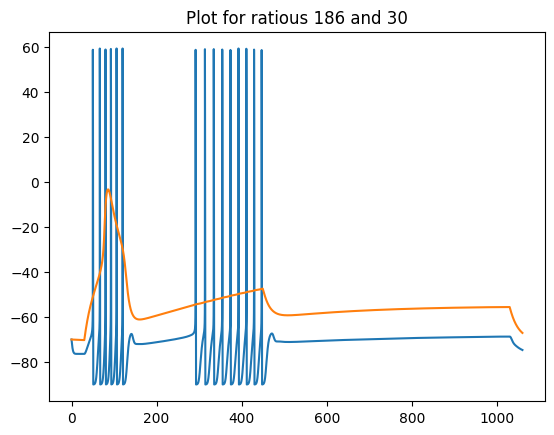

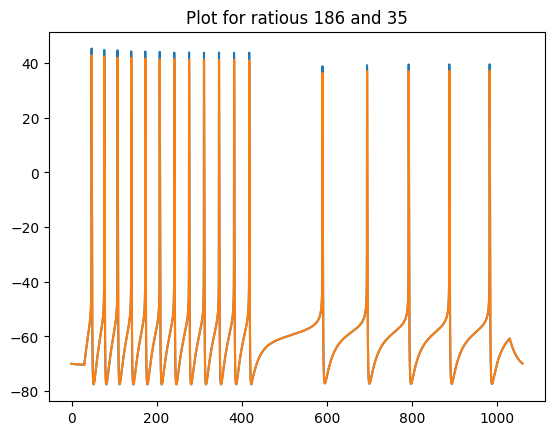

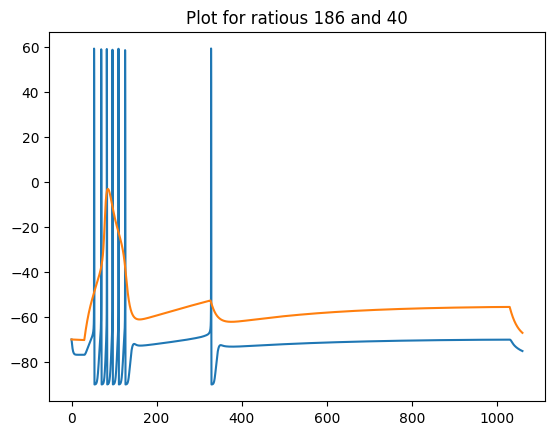

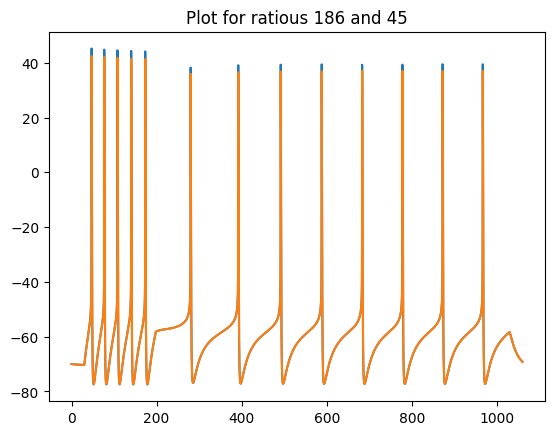

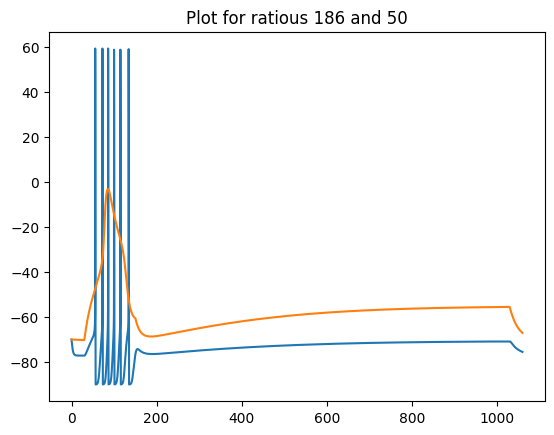

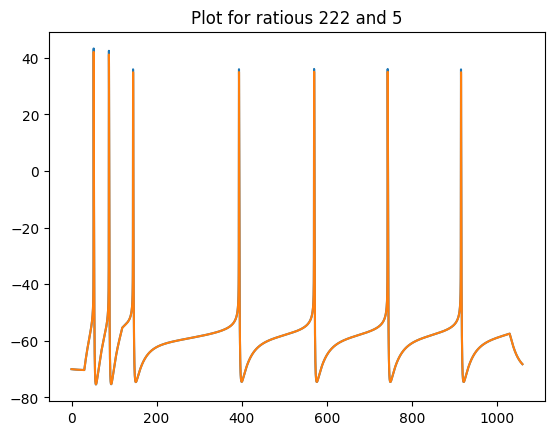

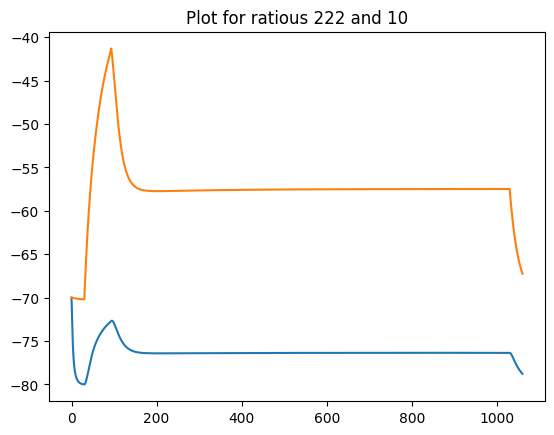

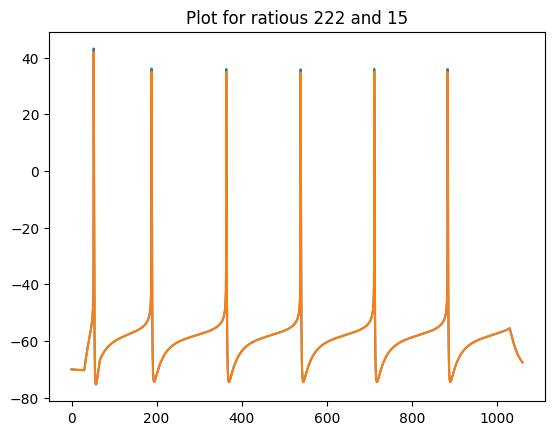

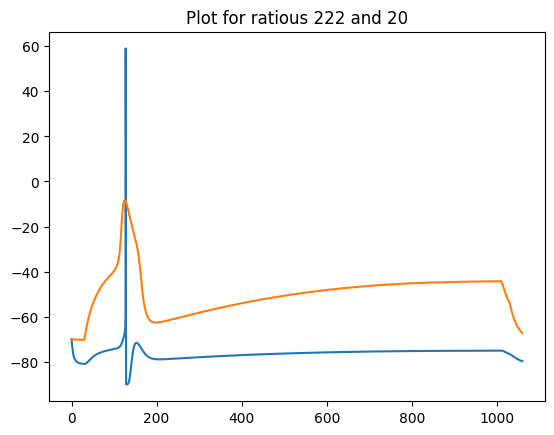

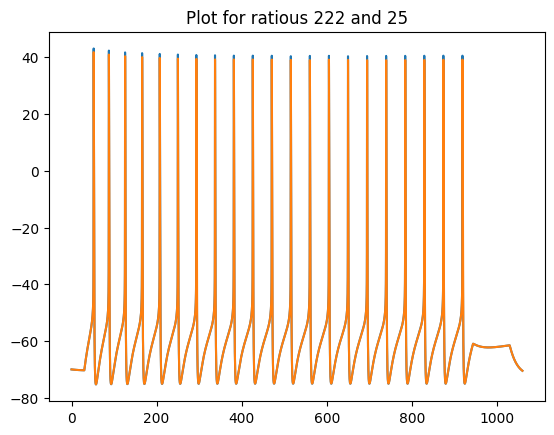

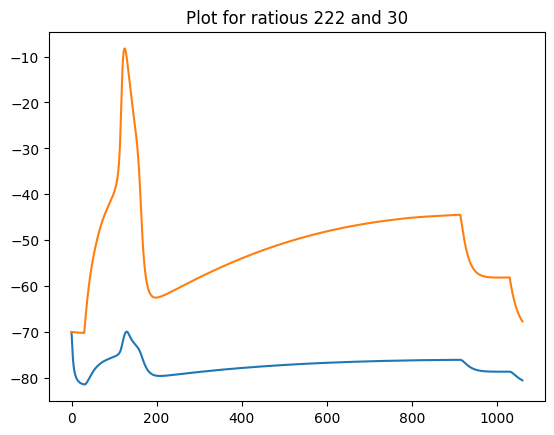

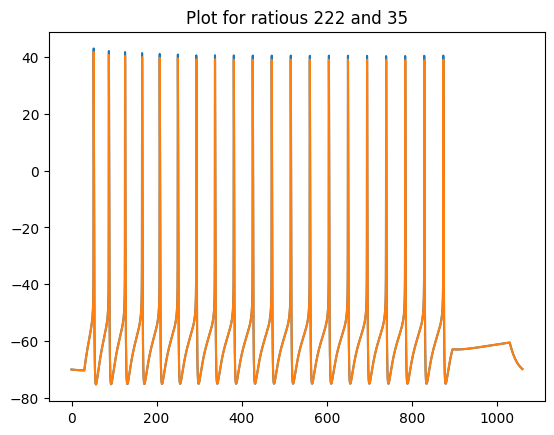

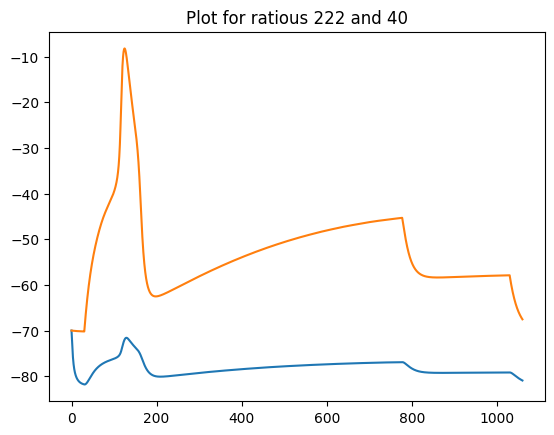

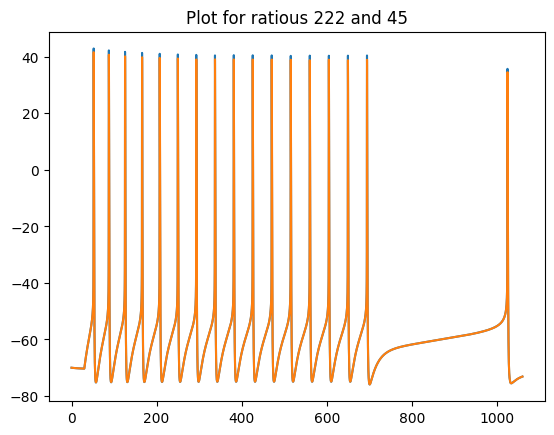

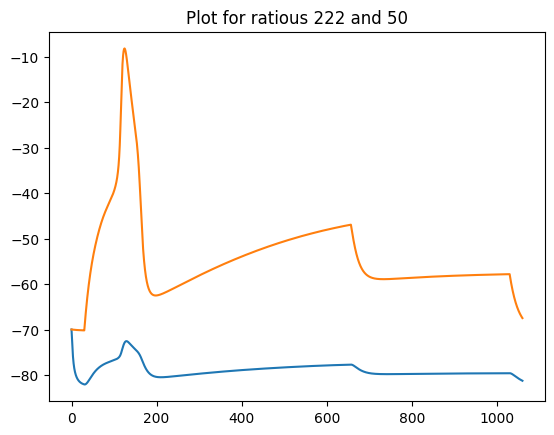

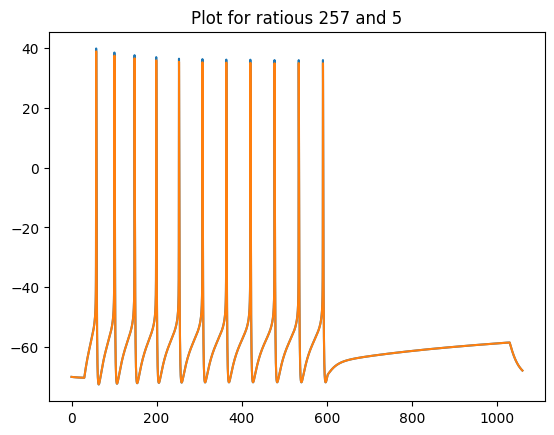

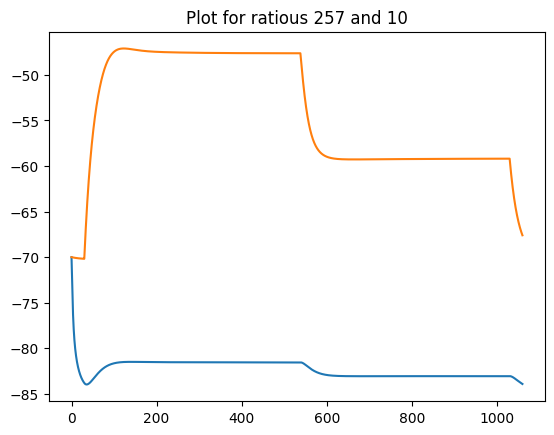

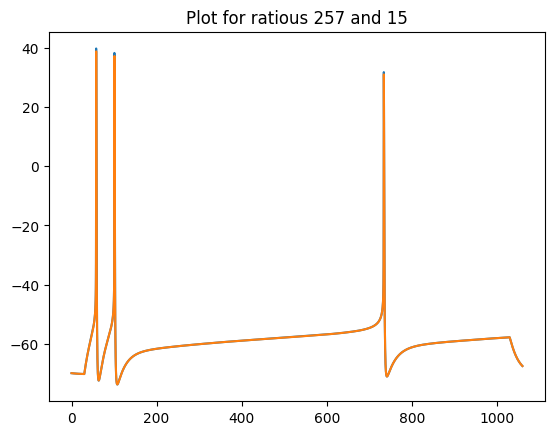

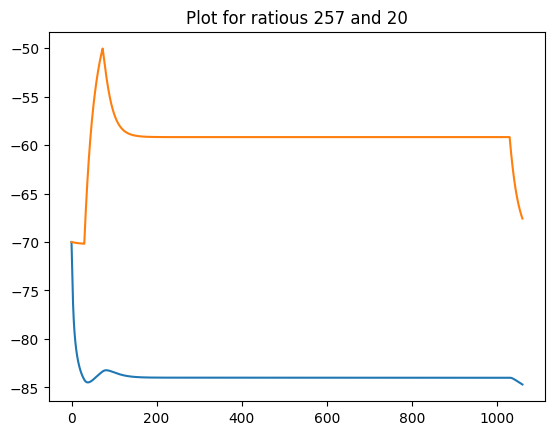

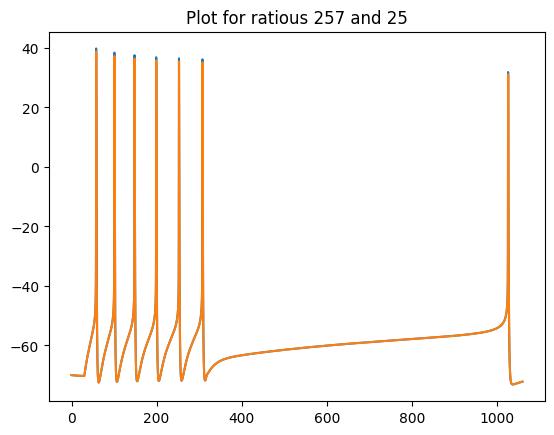

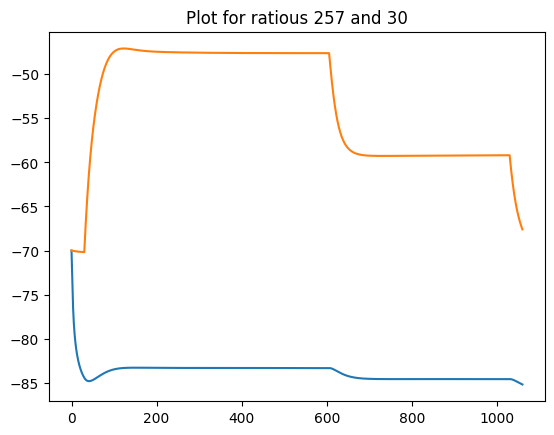

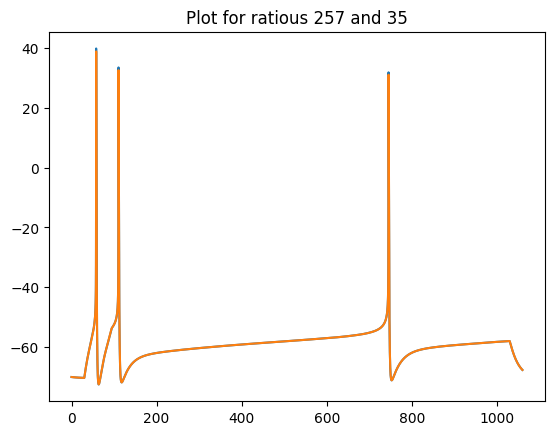

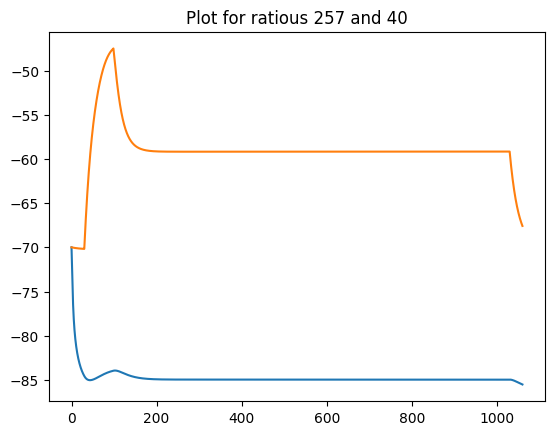

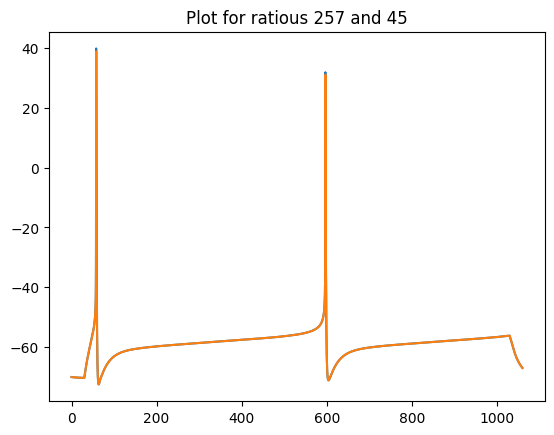

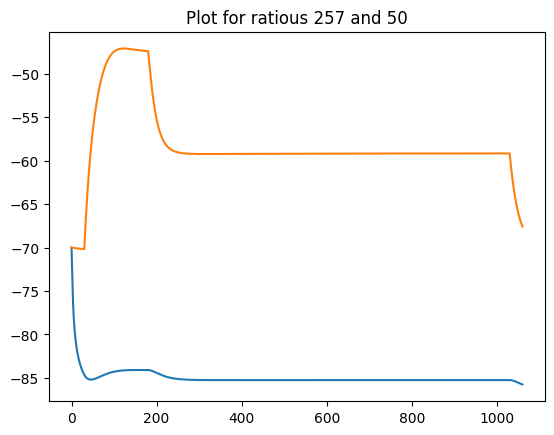

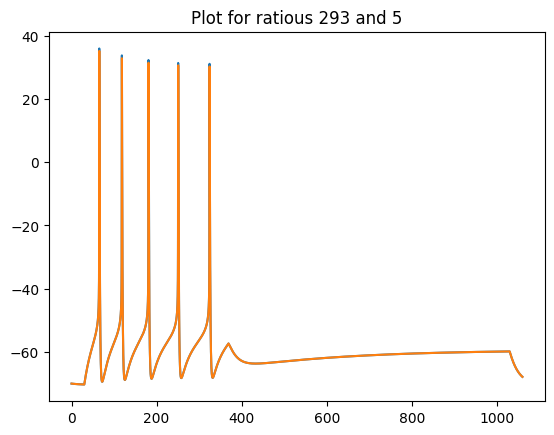

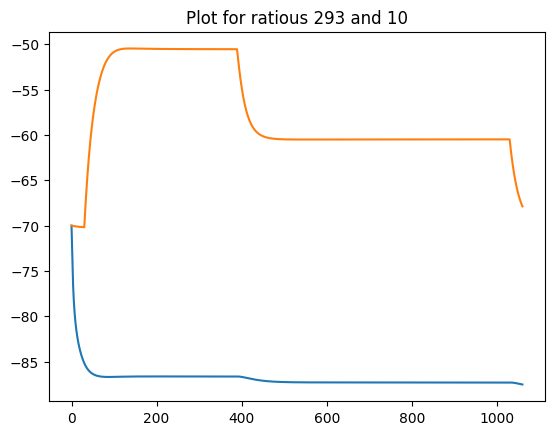

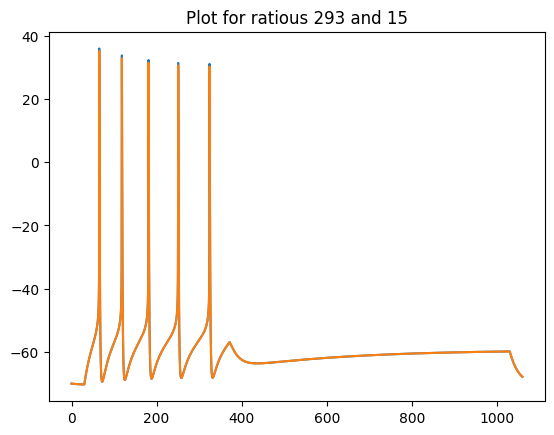

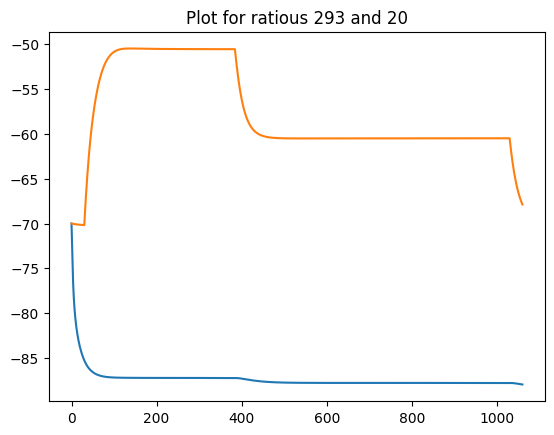

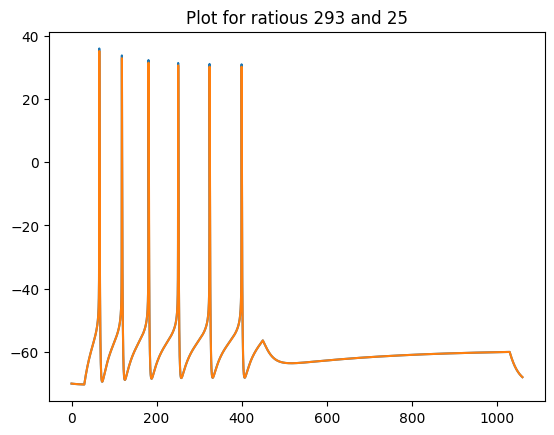

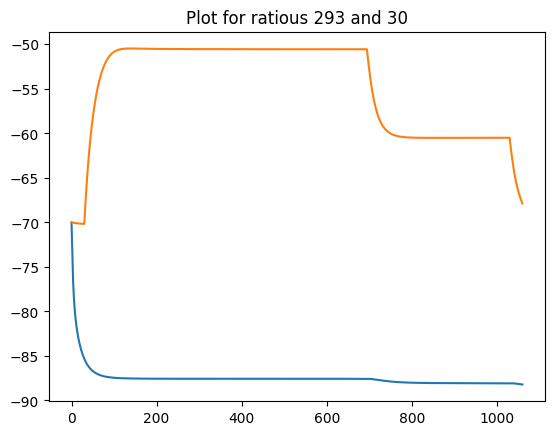

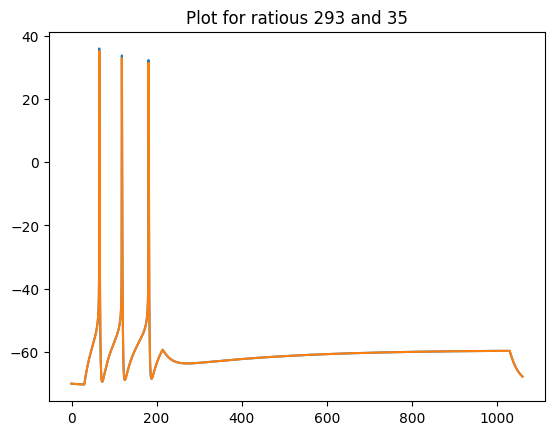

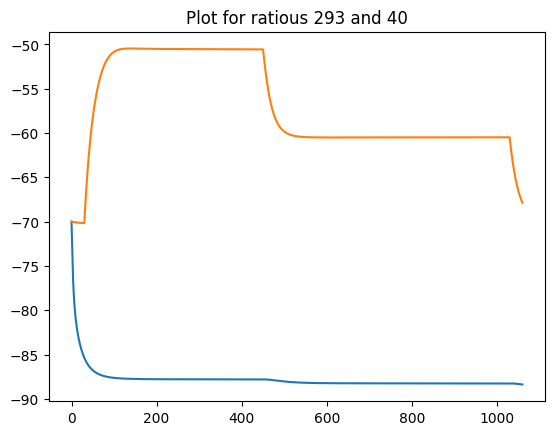

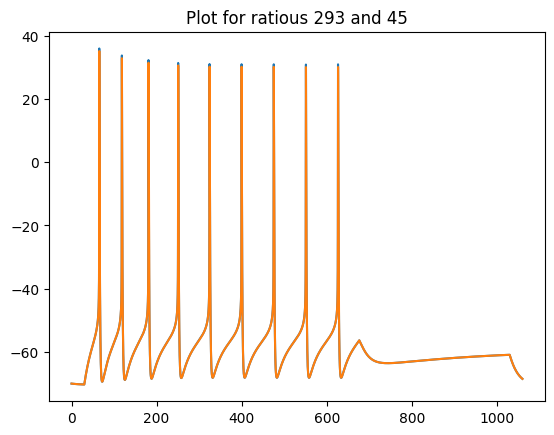

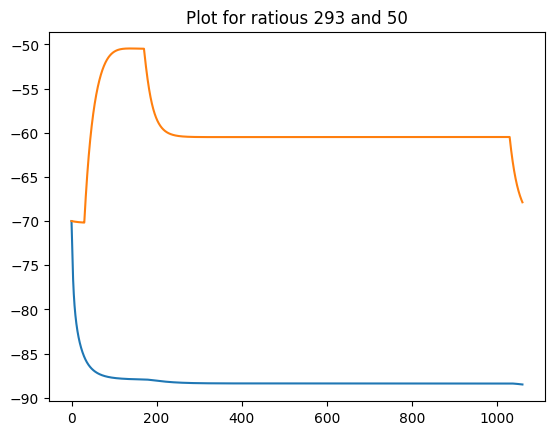

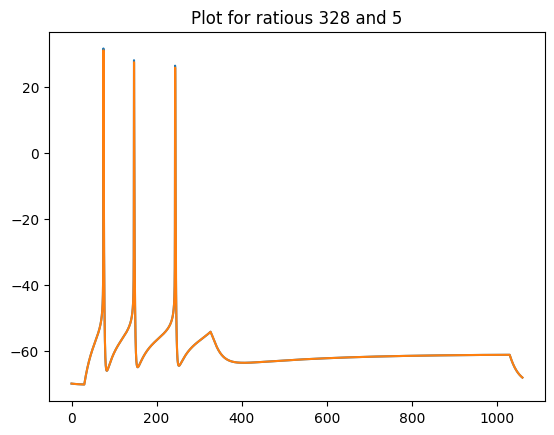

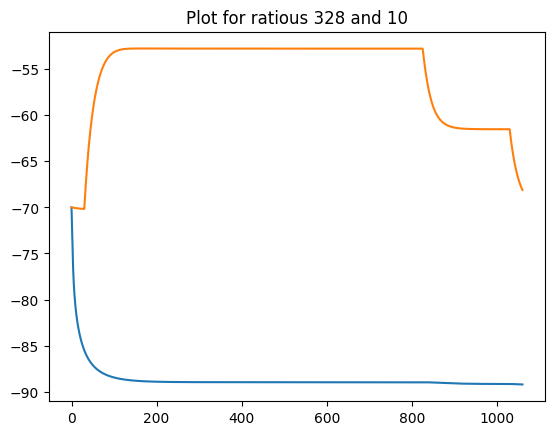

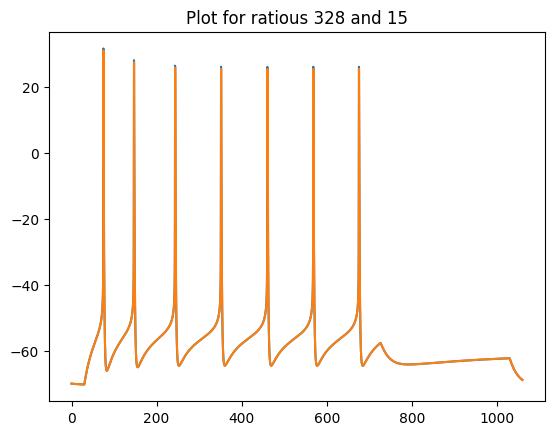

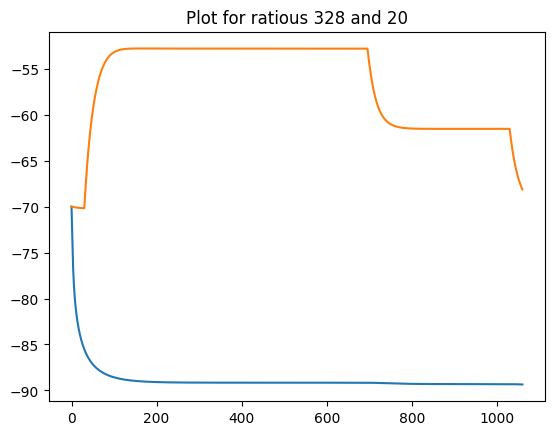

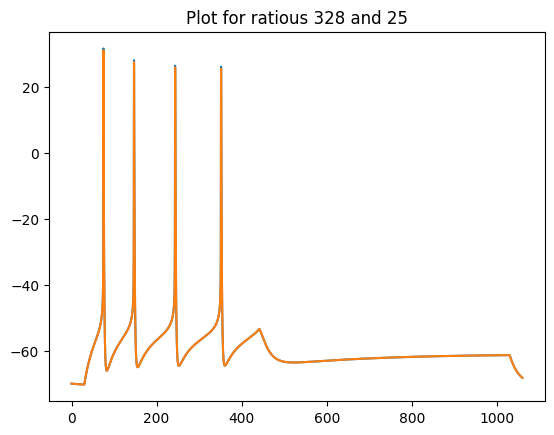

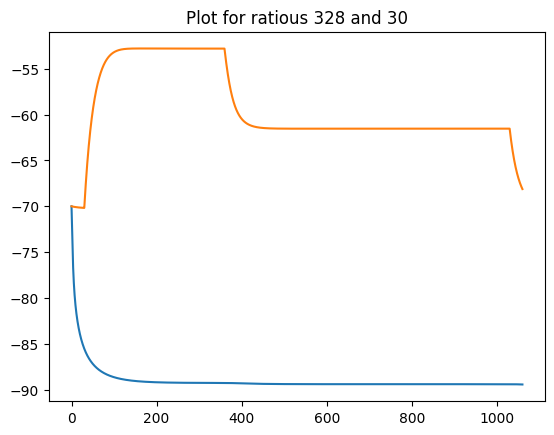

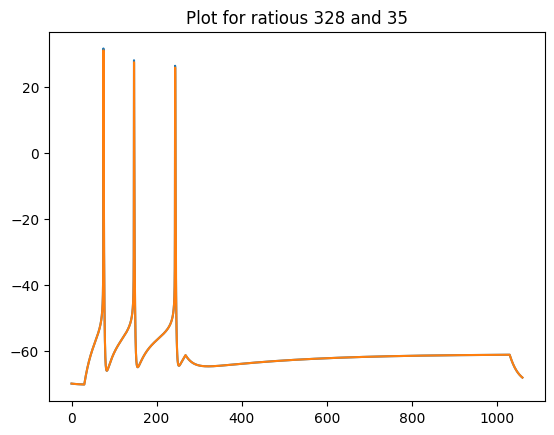

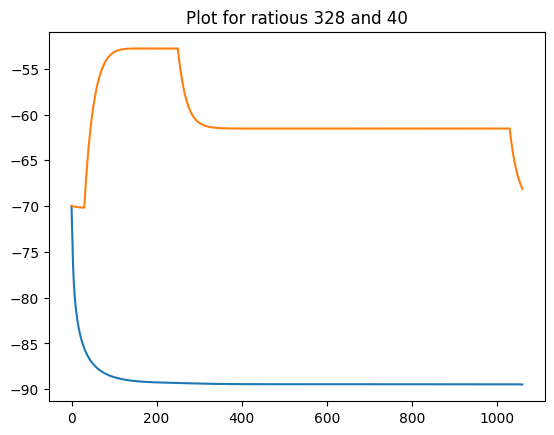

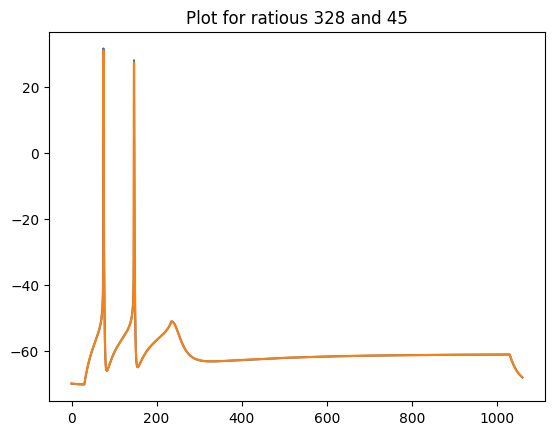

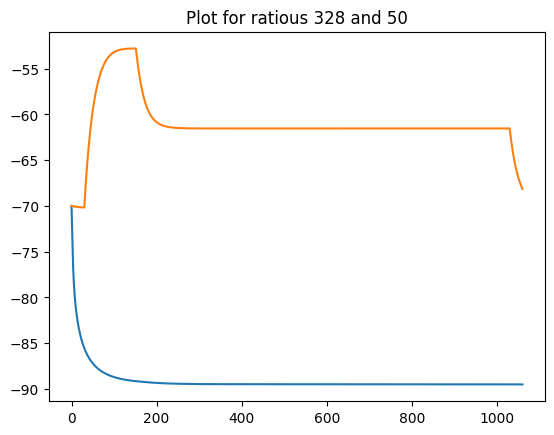

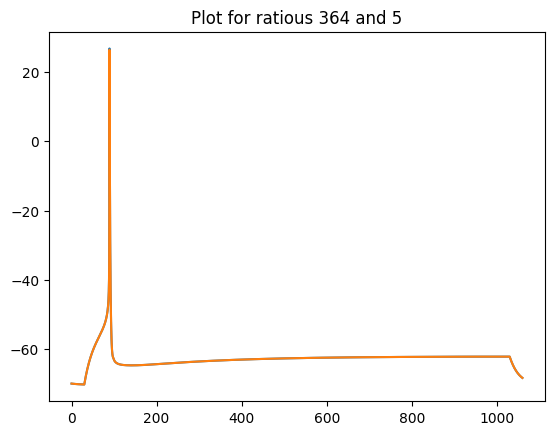

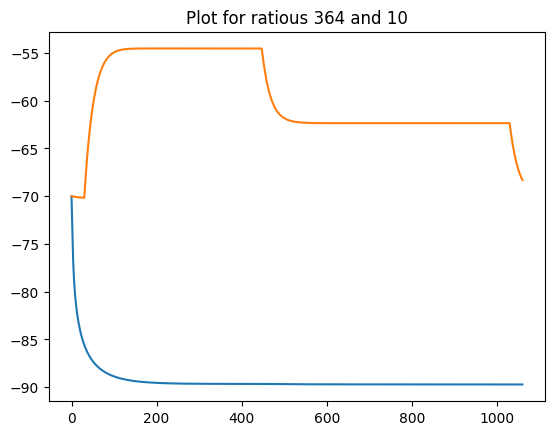

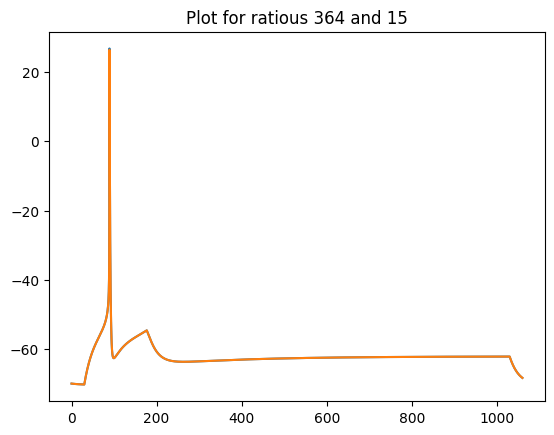

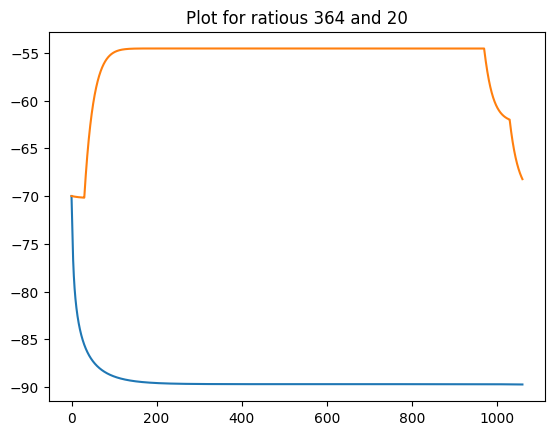

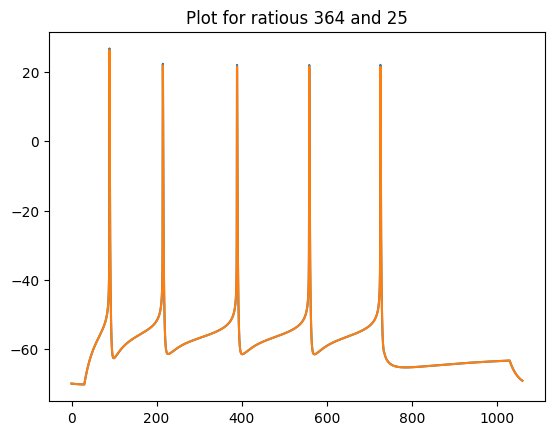

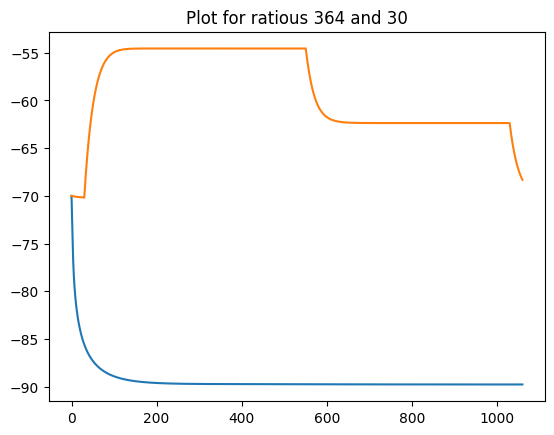

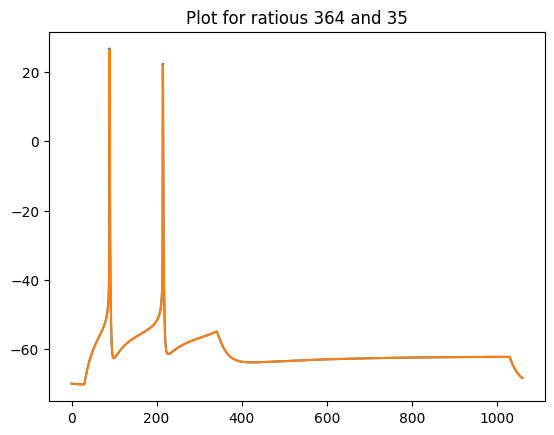

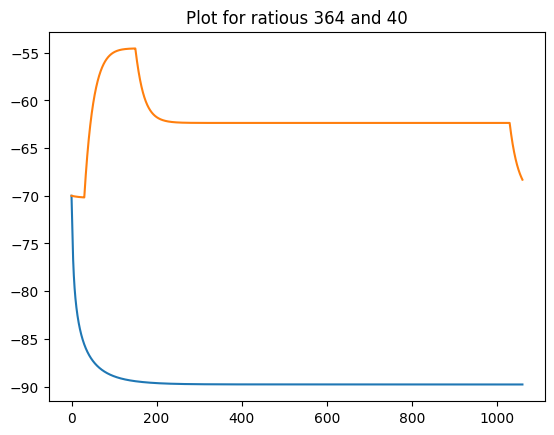

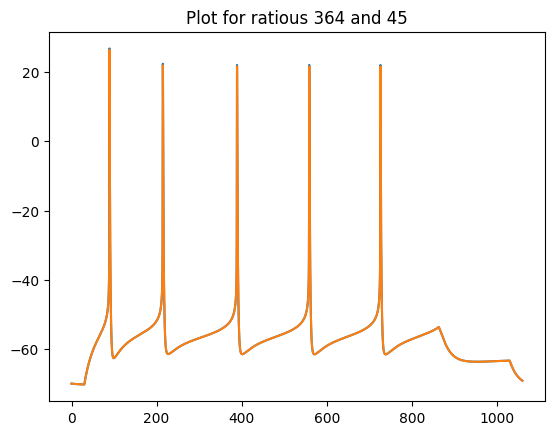

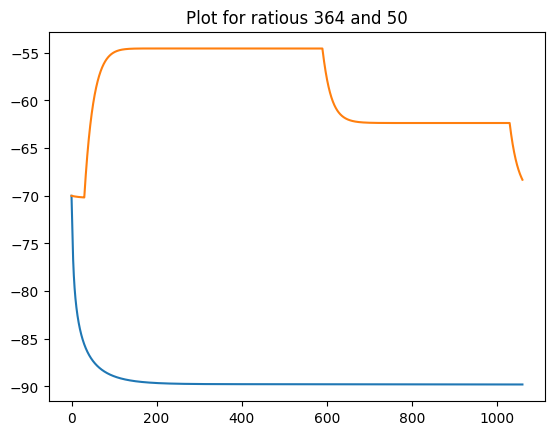

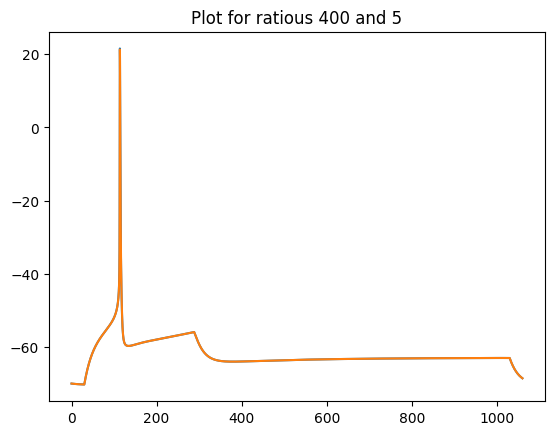

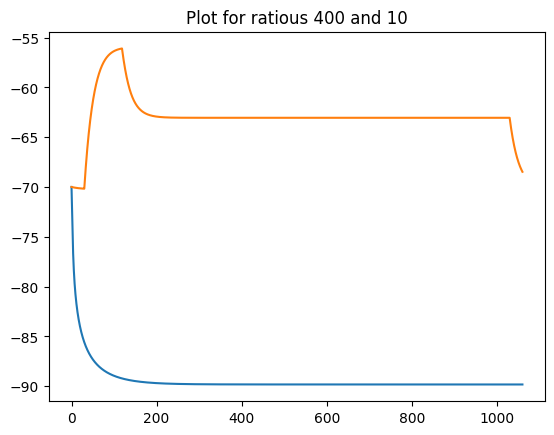

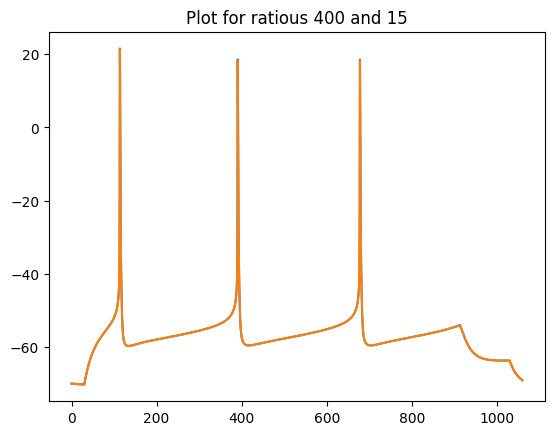

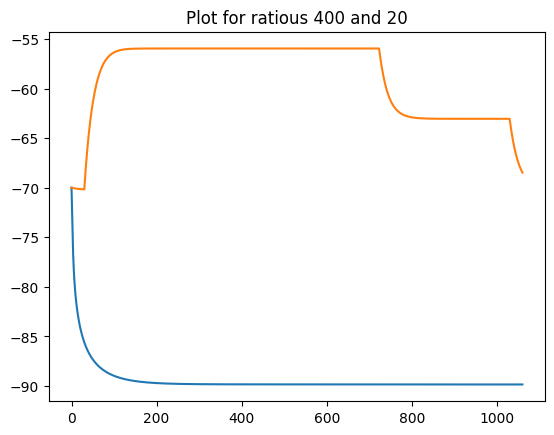

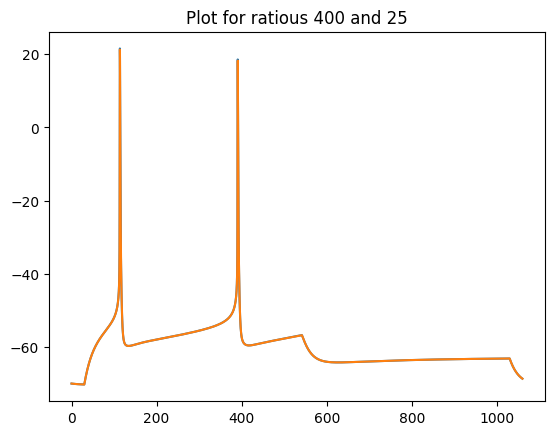

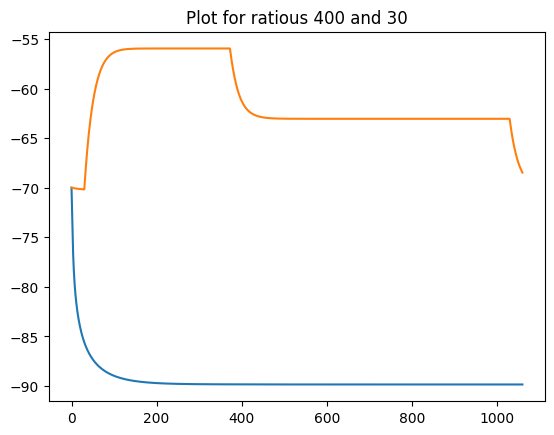

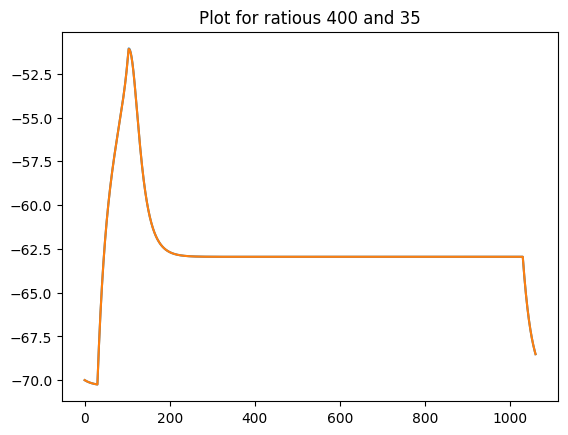

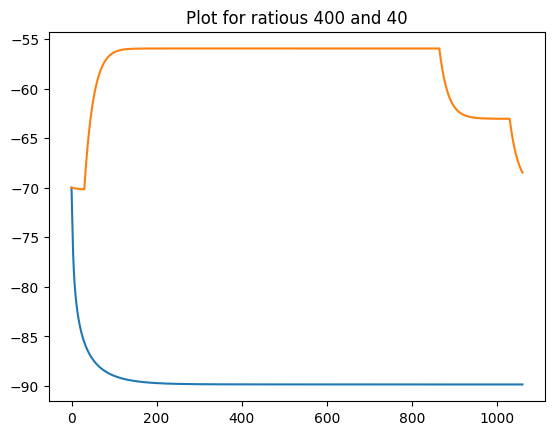

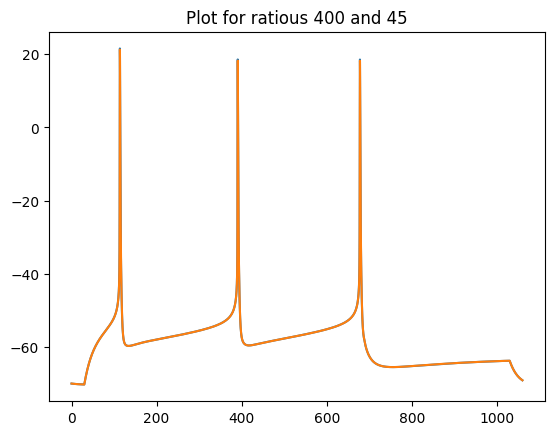

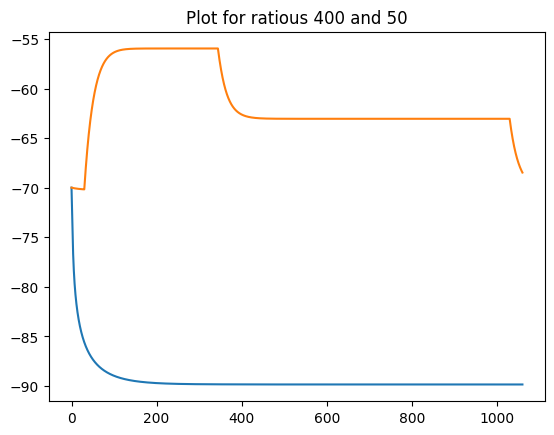

In [16]:
from scipy.signal import find_peaks

n = neuron(False, False)

RHO = linspace(80, 400, 10)
KAPPA = linspace(5, 50, 10)

threshold_delta = []
num_spikes_delta =[]
i=0

for rho_ in RHO:
  for kappa_ in KAPPA:
    n.set(rho = rho_, kappa = kappa_)

    va, vd = h.Vector(), h.Vector()
    va.record(n.axon(0.5)._ref_v, sec = n.axon)
    vd.record(n.dend(0.5)._ref_v, sec = n.dend)

    ic = h.IClamp(0.5, n.dend, sec = n.dend)
    ic.delay = 30
    ic.dur = 1000
    ic.amp = 0.1

    h.finitialize(-70)
    h.fcurrent()
    h.frecord_init()

    h.t = 0

    while h.t < 1060: h.fadvance()

    va = array(va)
    vd = array(vd)
    vt = arange(va.shape[0])*h.dt

    threshold_va = (va.min()+va.max())/2
    threshold_vd = (vd.min()+vd.max())/2
    threshold_delta.append(threshold_va-threshold_vd)

    peaks_vd, _ = find_peaks(vd, height=threshold_vd)
    peaks_va, _ = find_peaks(va, height=threshold_va)

    # Count the number of spikes
    num_spikes_va = len(peaks_va)
    num_spikes_vd = len(peaks_vd)
    num_spikes_delta.append(num_spikes_va-num_spikes_vd)

    i+=1
    figure(i)
    #plt.subplot(121)
    plot(vt, va, "-", label = "axon")
    #plt.subplot(122)
    plot(vt, vd, "-", label = "dend")
    title(f'Plot for ratious {int(rho_)} and {int(kappa_)}')


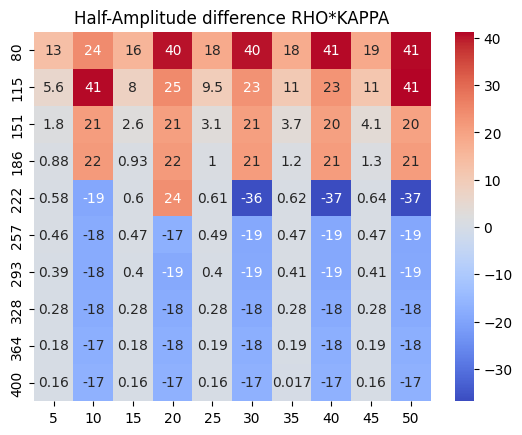

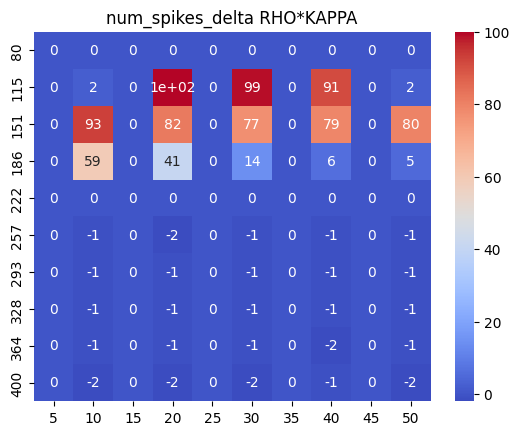

In [25]:
threshold_delta = array(threshold_delta).reshape(-1, 10) # RHO*KAPPA
num_spikes_delta = array(num_spikes_delta).reshape(-1, 10) # RHO*KAPPA
K=KAPPA.astype(int)
R = RHO.astype(int)
figure(200)
ax = sns.heatmap(threshold_delta, xticklabels=K, yticklabels=R, annot=True, cmap='coolwarm')
#ax.set(xlabel=KAPPA, ylabel=RHO)
title("Half-Amplitude difference RHO*KAPPA")
figure(201)
ax = sns.heatmap(num_spikes_delta, xticklabels=K, yticklabels=R,  annot=True, cmap='coolwarm')
#ax.set(xlabel=KAPPA, ylabel=RHO)
title("num_spikes_delta RHO*KAPPA")
show()